In [76]:
import numpy as np
import matplotlib.pyplot as plt

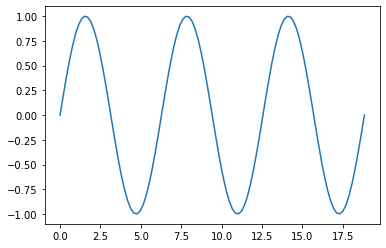

In [105]:
X = np.linspace(0, 6*np.pi, 100).reshape(-1,1)
Y = np.sin(X)
plt.plot(X,Y)

In [106]:
def polynomial_dataset(X, deg):
    N = len(X)
    X = np.concatenate((np.ones((N,1)),X), axis=-1)
    for i in range(deg-1):
        X = np.concatenate((X,(X[:,1]**(i+2)).reshape(-1,1)), axis=-1)
    return X

In [107]:
def train_and_test_gen(X, Y, train_size=20,test_size=20):
    N = len(X)
    train_idx = np.random.choice(N, train_size)
    train_X = X[train_idx]
    train_Y = Y[train_idx]
    test_idx = np.random.choice([x for x in range(N) if x not in train_idx] ,20)
    test_X = X[test_idx]
    test_Y = Y[test_idx]
    return train_X, train_Y, test_X, test_Y



[[1.         0.         0.        ]
 [1.         0.19039955 0.03625199]
 [1.         0.38079911 0.14500796]]


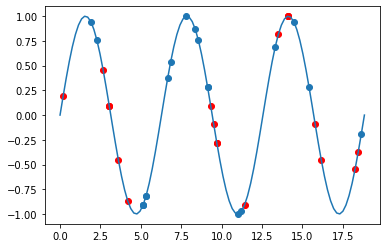

In [108]:
poly_X = polynomial_dataset(X, 2)
print(poly_X[:3])
train_X, train_Y, test_X, test_Y = train_and_test_gen(poly_X,Y)

plt.plot(X,Y)
plt.scatter(train_X[:,1], train_Y)
plt.scatter(test_X[:,1], test_Y, c='r')
plt.show()


In [109]:
def fit_and_plot(X, Y, poly_X, train_X, train_Y):
    weights = np.linalg.solve((train_X.T).dot(train_X), (train_X.T).dot(train_Y))
    Yhat = np.dot(poly_X, weights)
    plt.plot(X,Y)
    plt.scatter(train_X[:,1], train_Y)
    plt.plot(X, Yhat)
    plt.show()
    return weights, Yhat


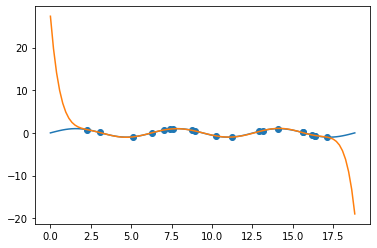

In [116]:

poly_X = polynomial_dataset(X, 9)
train_X, train_Y, test_X, test_Y = train_and_test_gen(poly_X,Y)
weights, Yhat = fit_and_plot(X, Y, poly_X, train_X, train_Y)

3
